In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
signal_frequency = 50  # in Hz

In [3]:
music = wavfile.read('data/oppa_input.wav')

In [4]:
music

(44100, array([ 0,  0,  0, ..., -2, -1,  1], dtype=int16))

In [5]:
fs = music[0]
sound_data = music[1]

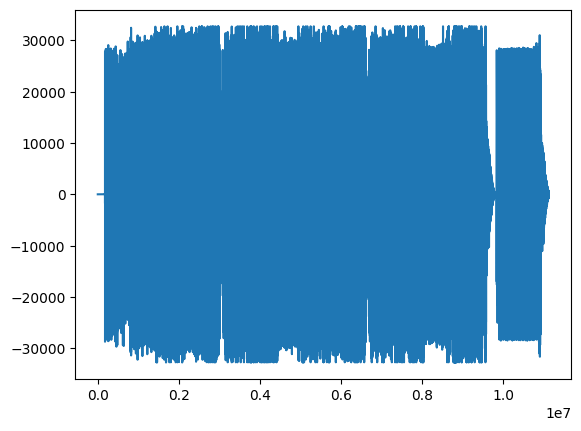

In [6]:
plt.plot(sound_data)

In [7]:
length = (sound_data.shape[0] // fs)  # in seconds

length

252

In [8]:
sound_data = sound_data[:fs * length]

In [9]:
# scale the data
sound_data = sound_data / np.max(np.abs(sound_data))


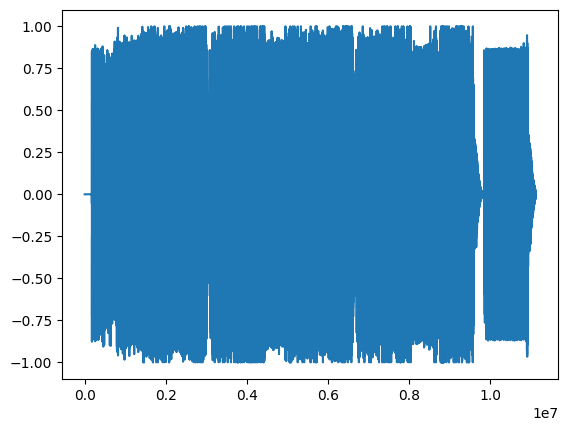

In [10]:
plt.plot(sound_data)

In [11]:
bit_duration = 0.4  # in seconds
bit_sample_duration = int(fs * bit_duration)

In [12]:
code_encode = "votre code : 5739. hint : regardez le LSB de chaque pixel de l'image."
# convert code to binary string forcing it to be 8 bits long
caracters_values = [ord(c) for c in code_encode]
code_string = ''.join([format(c, '08b') for c in caracters_values])
print(code_string)
code_string = code_string + format(4, '08b')
code_string, len(code_string)

011101100110111101110100011100100110010100100000011000110110111101100100011001010010000000111010001000000011010100110111001100110011100100101110001000000110100001101001011011100111010000100000001110100010000001110010011001010110011101100001011100100110010001100101011110100010000001101100011001010010000001001100010100110100001000100000011001000110010100100000011000110110100001100001011100010111010101100101001000000111000001101001011110000110010101101100001000000110010001100101001000000110110000100111011010010110110101100001011001110110010100101110


('01110110011011110111010001110010011001010010000001100011011011110110010001100101001000000011101000100000001101010011011100110011001110010010111000100000011010000110100101101110011101000010000000111010001000000111001001100101011001110110000101110010011001000110010101111010001000000110110001100101001000000100110001010011010000100010000001100100011001010010000001100011011010000110000101110001011101010110010100100000011100000110100101111000011001010110110000100000011001000110010100100000011011000010011101101001011011010110000101100111011001010010111000000100',
 560)

In [13]:
signal_data = np.zeros((fs * length,))
signal_data.shape

(11113200,)

In [14]:
for i in range(len(code_string)):
    if code_string[i] == '1':
        signal_data[i * bit_sample_duration:(i + 1) * bit_sample_duration] = np.sin(
            2 * np.pi * signal_frequency * np.linspace(
                i * bit_sample_duration,
                (i + 1) * bit_sample_duration,
                bit_sample_duration
            )
        )


In [15]:
final_audio = sound_data + signal_data * 0.5

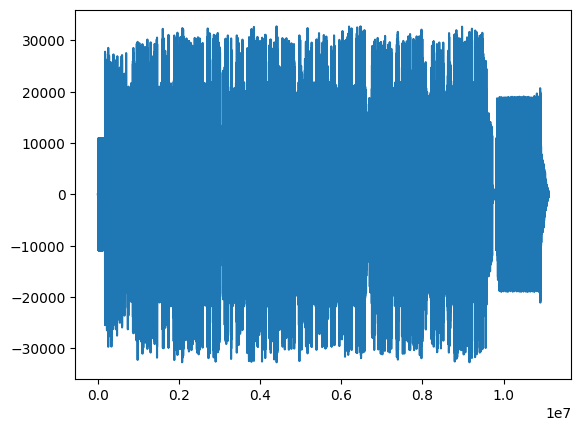

In [16]:
final_audio = final_audio / np.max(np.abs(final_audio))
final_audio = final_audio * 32767
plt.plot(final_audio)

In [17]:
wavfile.write("output/oppa_output.wav", fs, final_audio.astype(np.int16))

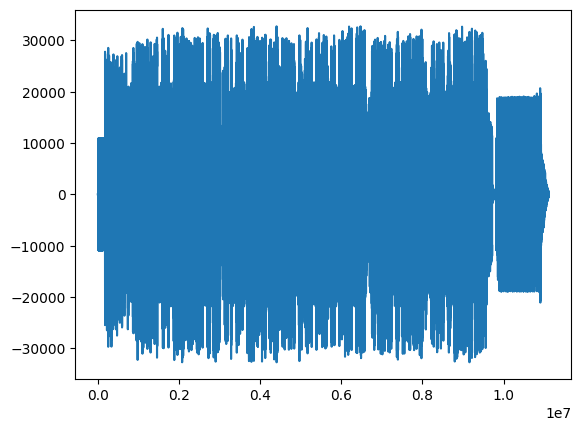

In [18]:
written_file = wavfile.read("output/oppa_output.wav")
plt.plot(written_file[1])